In [1]:
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from smodels.decomposition.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.base.model import Model
from collections import OrderedDict
from smodels.base.physicsUnits import fb, GeV

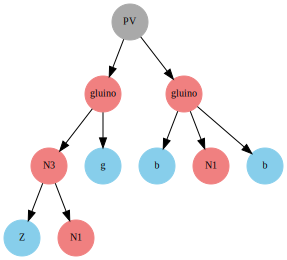

[PV, gluino, gluino, N3, g, Z, N1, b, N1, b]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(PV, gluino), (PV, gluino), (gluino, N3), (gluino, g), (gluino, b), (gluino, N1), (gluino, b), (N3, Z), (N3, N1)]


In [2]:
stringEl = "(PV > gluino(1),gluino(2)), (gluino(1) > N3(3),g), (N3(3) > Z,N1), (gluino(2) > b,N1,b)"
slhafile="../../inputFiles/slha/higgsinoStop.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
tree = TheorySMS()
tree.add_nodes_from(expSMS.nodes)
tree.add_edges_from(expSMS.edgeIndices)
tree.draw()
print(tree.nodes)
print(tree.nodeIndices)
print(tree.edges)

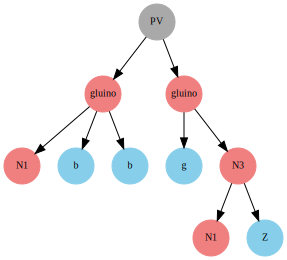

[PV, gluino, gluino, N1, b, b, g, N3, N1, Z]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(PV, gluino), (PV, gluino), (gluino, N1), (gluino, b), (gluino, b), (gluino, g), (gluino, N3), (N3, N1), (N3, Z)]


In [3]:
tree.sort()
tree.draw()
print(tree.nodes)
print(tree.nodeIndices)
print(tree.edges)

In [4]:
nodeListA = []
for node,nodeIndex in zip(tree.nodes,tree.nodeIndices):
    nodeListA.append((str(node),nodeIndex,
                     tree.nodeCanonName(nodeIndex)))
    print(*nodeListA[-1])

PV 0 11101010011011010000
gluino 1 11010100
gluino 2 1101101000
N1 3 10
b 4 10
b 5 10
g 6 10
N3 7 110100
N1 8 10
Z 9 10


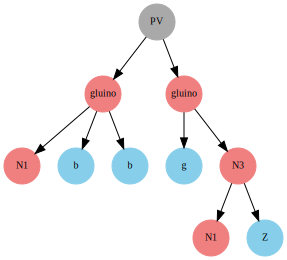

PV 0 11101010011011010000
gluino 1 11010100
gluino 2 1101101000
N1 3 10
b 4 10
b 5 10
g 6 10
N3 7 110100
N1 8 10
Z 9 10
True


In [5]:
stringEl = "(PV > gluino(1),gluino(2)), (gluino(1) > N1,b,b), (gluino(2) > N3(3),g), (N3(3) > N1,Z)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
tree = TheorySMS()
tree.add_nodes_from(expSMS.nodes)
tree.add_edges_from(expSMS.edgeIndices)

tree.sort()
tree.draw()
nodeListB = []
for node,nodeIndex in zip(tree.nodes,tree.nodeIndices):
    nodeListB.append((str(node),nodeIndex,
                     tree.nodeCanonName(nodeIndex)))
    print(*nodeListB[-1])
                     
print(nodeListA == nodeListB)                     

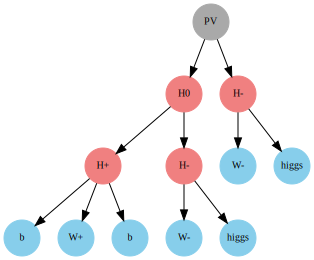

[PV, H0, H-, H+, H-, b, W+, b, W-, higgs, W-, higgs]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[(PV, H0), (PV, H-), (H0, H+), (H0, H-), (H-, W-), (H-, higgs), (H+, b), (H+, W+), (H+, b), (H-, W-), (H-, higgs)]


In [6]:
stringEl = "(PV > H0(1),H-(2)), (H0(1) > H+(3),H-(4)), (H+(3) > b,W+,b), (H-(4) > W-,higgs), (H-(2) > W-,higgs)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
tree = TheorySMS()
tree.add_nodes_from(expSMS.nodes)
tree.add_edges_from(expSMS.edgeIndices)

tree.draw()
print(tree.nodes)
print(tree.nodeIndices)
print(tree.edges)
# tree.draw(labelAttr='canonName')

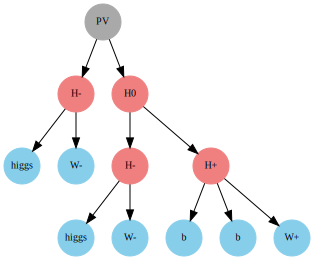

[PV, H-, H0, higgs, W-, H-, H+, higgs, W-, b, b, W+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[(PV, H-), (PV, H0), (H-, higgs), (H-, W-), (H0, H-), (H0, H+), (H-, higgs), (H-, W-), (H+, b), (H+, b), (H+, W+)]


In [7]:
tree.sort()
tree.draw()
print(tree.nodes)
print(tree.nodeIndices)
print(tree.edges)

In [8]:
for node,nodeIndex in zip(tree.nodes,tree.nodeIndices):
    print(node,nodeIndex,tree.nodeCanonName(nodeIndex))

PV 0 111010011101001101010000
H- 1 110100
H0 2 1110100110101000
higgs 3 10
W- 4 10
H- 5 110100
H+ 6 11010100
higgs 7 10
W- 8 10
b 9 10
b 10 10
W+ 11 10


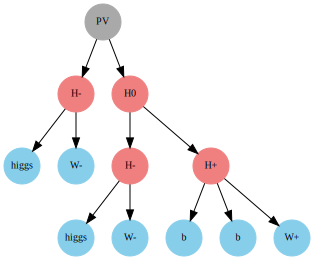

[PV, H-, H0, higgs, W-, H-, H+, higgs, W-, b, b, W+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[(PV, H-), (PV, H0), (H-, higgs), (H-, W-), (H0, H-), (H0, H+), (H-, higgs), (H-, W-), (H+, b), (H+, b), (H+, W+)]


In [9]:
# Tree should be sorted after setting global properties:
stringEl = "(PV > H0(1),H-(2)), (H0(1) > H+(3),H-(4)), (H+(3) > W+,b,b), (H-(4) > W-,higgs), (H-(2) > W-,higgs)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
tree = TheorySMS()
tree.add_nodes_from(expSMS.nodes)
tree.add_edges_from(expSMS.edgeIndices)
tree.maxWeight = 1.0*fb
tree.prodXSec = 1.0*fb
tree.setGlobalProperties()

tree.draw()
print(tree.nodes)
print(tree.nodeIndices)
print(tree.edges)

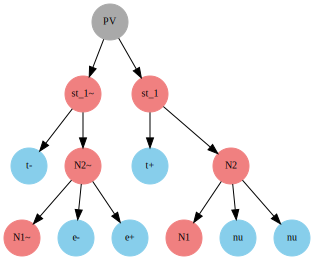

[PV, st_1~, st_1, t-, N2~, t+, N2, N1~, e-, e+, N1, nu, nu]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[(PV, st_1~), (PV, st_1), (st_1~, t-), (st_1~, N2~), (st_1, t+), (st_1, N2), (N2~, N1~), (N2~, e-), (N2~, e+), (N2, N1), (N2, nu), (N2, nu)]


In [10]:
stringEl = "(PV > st_1~(1),st_1(2)), (st_1~(1) > N2~(3),t-), (st_1(2) > N2(4),t+), (N2~(3) > N1~,e-,e+), (N2(4) > N1,nu,nu)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
tree = TheorySMS()
tree.add_nodes_from(expSMS.nodes)
tree.add_edges_from(expSMS.edgeIndices)
tree.maxWeight = 1.0*fb
tree.prodXSec = 1.0*fb

tree.setGlobalProperties()
tree.draw()
print(tree.nodes)
print(tree.nodeIndices)
print(tree.edges)

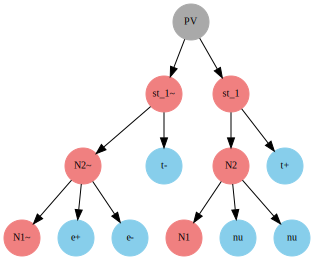

[PV, st_1~, st_1, N2~, N2, t-, t+, N1~, e+, e-, N1, nu, nu]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[(PV, st_1~), (PV, st_1), (st_1~, N2~), (st_1~, t-), (st_1, N2), (st_1, t+), (N2~, N1~), (N2~, e+), (N2~, e-), (N2, N1), (N2, nu), (N2, nu)]


In [11]:
stringEl = "(PV > st_1~(1),st_1(2)), (st_1~(1) > N2~(3),t-), (st_1(2) > N2(4),t+), (N2~(3) > N1~,e+,e-), (N2(4) > N1,nu,nu)"
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string(stringEl, model=model)
treeB = TheorySMS()
treeB.add_nodes_from(expSMS.nodes)
treeB.add_edges_from(expSMS.edgeIndices)
treeB.maxWeight = 1.0*fb
treeB.prodXSec = 1.0*fb

# treeB.setGlobalProperties()
treeB.draw()
print(treeB.nodes)
print(treeB.nodeIndices)
print(treeB.edges)

In [12]:
tree == treeB

True